In [100]:
import numpy as np
import matplotlib.pyplot as plt
import string
from scipy.integrate import odeint

from matplotlib.ticker import FuncFormatter

In [5]:
gamma = 0.0138172
 
eta0 = 6.205e-6
phi0 = 6.205e-6

r_R = 63
r_P = 63
l_R = 5000
l_P = 975

T = 10000

R_t = []
P_t = []

h = 0.01

R_0, P_0 = 5773,2.11e6

In [6]:
n_ribo_volume = lambda volume : (7.280245377599019e21*(1 + 1.3322199014570686e-12/
     volume**0.6454883435592754)*volume**0.6971221467560254)/(-5000*(1 +
 1.3322199014570686e-12/volume**0.6454883435592754) + 
   1.3525663798553437e-6/volume**0.6454883435592754)

n_prot_volume = lambda volume : 7.466918335998994e18*(volume**0.6971221467560254)

div_time_volume = lambda volume : 1.4881390043125451e-8/volume**0.6454883435592754

def trajectories(V=1e-18, T=100000, n_traj=200):
     R_t = np.zeros((T, n_traj))
     P_t = np.zeros((T, n_traj))
 
     R_0 = n_ribo_volume(V)
     P_0 = n_prot_volume(V)
 
     R_0 = np.random.normal(R_0, 20, n_traj)
     P_0 = np.random.normal(P_0, 2e4, n_traj)
 
     for t in range(T): 
         eta = np.random.normal(eta0, 1e-2, n_traj)
         phi = np.random.normal(phi0, 1e-2, n_traj)
 
         R = (gamma*r_R*h/l_R - eta*h + 1)*R_0
         P = ((1-gamma)*r_P*h/l_P)*R_0 + (1-phi*h)*P_0
 
         R_t[t] = R
         P_t[t] = P
 
         R_0 = R
         P_0 = P
 
     return np.dstack((R_t, P_t))




In [18]:
traj = trajectories(T=412589, n_traj=40)
traj_avg = traj.mean(1)


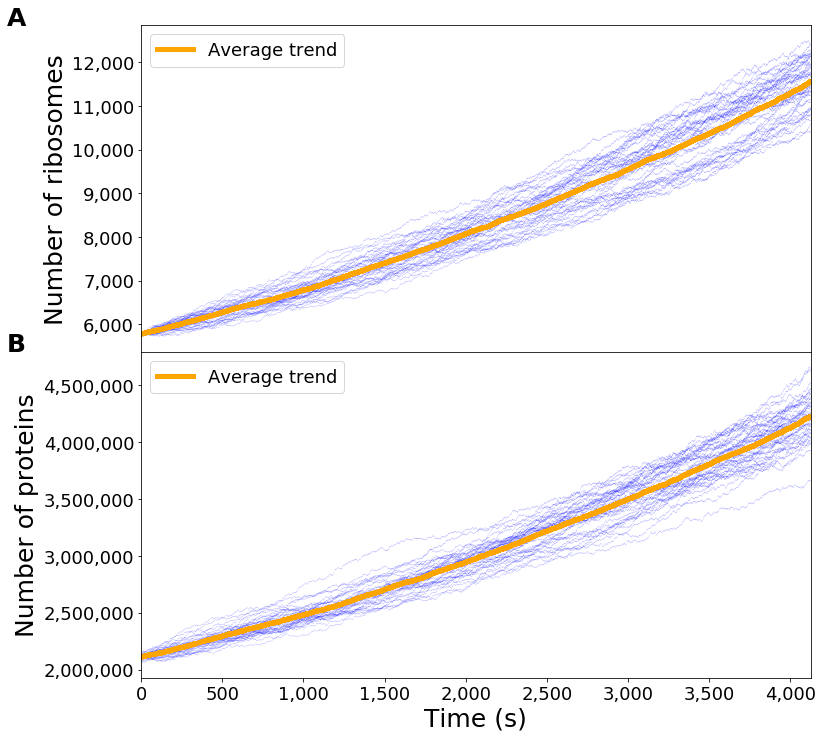

In [105]:


fig, axes = plt.subplots(2, figsize=(12,12), sharex=True)

for line in traj.transpose(1,2,0):
    axes[0].plot(np.arange(412589)/100, line[0], linewidth=0.1, c='b', alpha=0.3)
    axes[1].plot(np.arange(412589)/100, line[1], linewidth=0.1, c='b', alpha=0.3)

axes[0].plot(np.arange(412589)/100,traj_avg.T[0], linewidth=5, c='orange', label='Average trend')
axes[0].set_ylabel('Number of ribosomes', fontsize=25)
axes[1].plot(np.arange(412589)/100,traj_avg.T[1], linewidth=5, c='orange', label='Average trend')
axes[1].set_ylabel('Number of proteins', fontsize=25)
axes[1].set_xlabel('Time (s)', fontsize=25)

axes[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 18)

for n,ax in enumerate(axes.ravel()):
    ax.text(-0.2, 1.0, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=25, weight='bold')
    ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_xlim([0,4125.89])
    ax.legend(fontsize=18)


#plt.yscale('log')
plt.subplots_adjust(hspace=0)
plt.show()

In [106]:
traj_avg[-1]/traj_avg[0]

array([2.00170016, 1.99999977])

In [121]:
div_time_volume(0.25e-16)

774.6039427491764